In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import sys

CNN does the processing of Images with the help of matrixes of weights known as filters. They detect low-level features like vertical and horizontal edges etc. Through each layer, the filters recognize high-level features.

In [2]:
# Now that we have imported the necessary packages, we can initialize our CNN Model.
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization()) 
# Batch Normalization Deep Network Training by Reducing Internal Covariate Shift, otherwise it allows us to use much higher 
# learning rates and be less careful about initialization and help the program achieves the same accuracy with 14 times fewer training steps
# It also acts as a regularizer, in some cases eliminating the need for Dropout.
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. 
# Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy',
  optimizer=opt,metrics=['accuracy'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

Now, we can import our data:

In [4]:
train_path = 'training_set'
test_path = 'test_set'

## ImageDataGenerator:
The ImageDataGenerator class in Keras is used for implementing image augmentation. This simply means it can generate augmented images dynamically during the training of the model making the overall mode more robust and accurate. If this class was not present, then in that case we would have to manually generate the augmented image as a preprocessing step and include them in our training dataset.

## Image Augmentation:
Image Augmentation is a way of applying different types of transformation techniques on actual images, thus producing copies of the same image with alterations. This helps to train deep learning models on more image variations than what is present in the actual dataset.

This is especially useful when we do not have enough images to train the model on, hence we can use augmented images to enlarge the training set and provide more images to the model.

Performing data augmentation is a form of regularization, enabling our model to generalize better.

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)

In [6]:
train_batches = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=64, class_mode = 'categorical')
# The model weights will be updated after each batch of 64 samples. (we have 8005/64 = 125 batches + one batche of 5 samples so 126 batches)
# This also means that one epoch will involve 126 batches or 126 updates to the model.

test_batches = train_datagen.flow_from_directory(test_path, target_size=(224,224), batch_size=17, class_mode = 'categorical', shuffle = False)
# We have set shuffle to False because you need to yield the images in “order”, to predict the outputs and match them with their unique ids or filenames.

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [7]:
imgs, labels = next(train_batches)

[0. 1.]


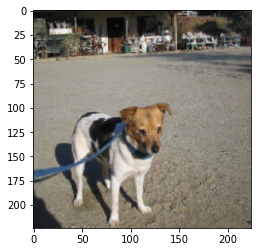

In [8]:
plt.imshow(imgs[7])
print(labels[7])

[1. 0.]


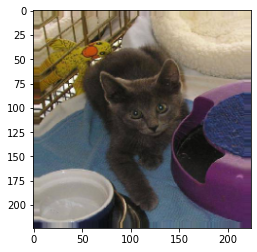

In [9]:
plt.imshow(imgs[1])
print(labels[1])

In [10]:
STEP_SIZE_TRAIN = train_batches.n//train_batches.batch_size
STEP_SIZE_TEST = test_batches.n//test_batches.batch_size

history = model.fit_generator(generator = train_batches, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test_batches,
                    validation_steps=STEP_SIZE_TEST,
                    epochs=10)
#With 10 epochs, the model will pass through the whole dataset 10 times. That is a total of 1260 batches during the entire training process.

C:\Users\anas_\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
125/125 [==============================] - 1133s 9s/step - loss: 0.9463 - accuracy: 0.5989 - val_loss: 3.3625 - val_accuracy: 0.4998
Epoch 2/10
125/125 [==============================] - 1098s 9s/step - loss: 0.6601 - accuracy: 0.6595 - val_loss: 0.8882 - val_accuracy: 0.5640
Epoch 3/10
125/125 [==============================] - 1098s 9s/step - loss: 0.5987 - accuracy: 0.6822 - val_loss: 1.2292 - val_accuracy: 0.5447
Epoch 4/10
125/125 [==============================] - 1030s 8s/step - loss: 0.5605 - accuracy: 0.7111 - val_loss: 2.0104 - val_accuracy: 0.5215
Epoch 5/10
125/125 [==============================] - 1232s 10s/step - loss: 0.5410 - accuracy: 0.7293 - val_loss: 1.6350 - val_accuracy: 0.5576
Epoch 6/10
125/125 [==============================] - 1000s 8s/step - loss: 0.5287 - accuracy: 0.7325 - val_loss: 1.3748 - val_accuracy: 0.5774
Epoch 7/10
125/125 [==============================] - 1296s 10s/step - loss: 0.5201 - accuracy: 0.7451 - val_loss: 1.8444 - val_accurac

**fit_generator** method will be deprecated in future releases of TensorFlow as the **.fit** method can automatically detect if the input data is an array or a generator.

As you see in the results above, the final accuracy is 0.76 while the validation accuracy is 0.68, it's common for validation accuracy to be lower than accuracy. But ideally, we should strive to keep those values at the same level.

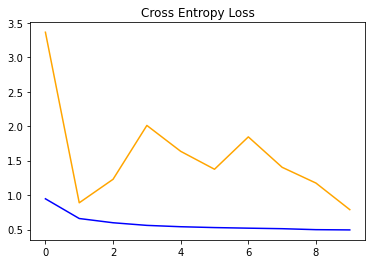

In [15]:
# plot diagnostic learning curves

# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

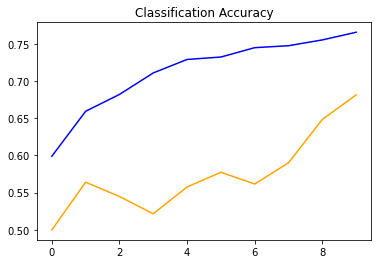

In [16]:
# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')